## Binning

Binning is the process of dividing values of a continuous variable into finite buckets/intervals (discretisation). Which allows better understanding the relationship with target variable

http://gnpalencia.org/optbinning/index.html


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer # see toy datasets for sklearn for more details

data = load_breast_cancer()

In [2]:
feature_names = data["feature_names"]
labels = data["target_names"]

df = pd.DataFrame(data.data, columns=data.feature_names)

print(feature_names)
print(labels)
df.head()

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
variable = "mean radius"
x = df[variable].values
y = data.target

In [9]:
from optbinning import OptimalBinning
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp")
optb.fit(x, y)
optb.status
optb.splits
binning_table = optb.binning_table

In [10]:
optb.status

'OPTIMAL'

In [11]:
optb.splits

array([11.42500019, 12.32999992, 13.09499979, 13.70499992, 15.04500008,
       16.92500019])

In [13]:
binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 11.43)",118,0.207381,3,115,0.974576,-3.12517,0.962483,0.087205
1,"[11.43, 12.33)",79,0.138840,3,76,0.962025,-2.710972,0.538763,0.052198
2,"[12.33, 13.09)",68,0.119508,7,61,0.897059,-1.643814,0.226599,0.025513
3,"[13.09, 13.70)",49,0.086116,10,39,0.795918,-0.839827,0.052131,0.006331
4,"[13.70, 15.05)",83,0.145870,28,55,0.662651,-0.153979,0.003385,0.000423
5,"[15.05, 16.93)",54,0.094903,44,10,0.185185,2.002754,0.359566,0.038678
6,"[16.93, inf)",118,0.207381,117,1,0.008475,5.283323,2.900997,0.183436
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,569,1.000000,212,357,0.627417,,5.043925,0.393784


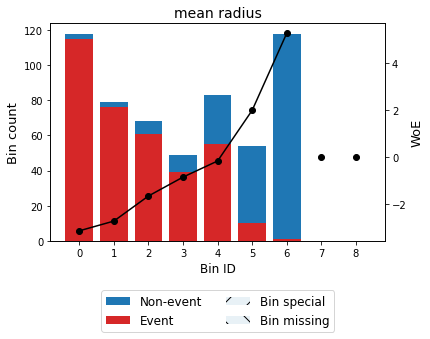

In [21]:
binning_table.plot(metric="woe") # weight of evidence

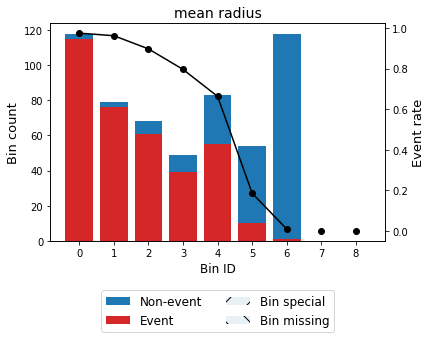

In [22]:
binning_table.plot(metric="event_rate") # event rate (class positive rate)

In [16]:
x_transform_woe = optb.transform(x, metric="woe") # can also use other values such as event_rate / bins

In [20]:
pd.Series(x_transform_woe).value_counts()

 5.283323    118
-3.125170    118
-0.153979     83
-2.710972     79
-1.643814     68
 2.002754     54
-0.839827     49
dtype: int64

In [28]:
# for categorical
df_cat = pd.read_csv("./home-credit-default-risk/application_train.csv", engine='c')
variable_cat = "NAME_INCOME_TYPE"
x_cat = df_cat[variable_cat].values
y_cat = df_cat.TARGET.values

df_cat[variable_cat].value_counts()


Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [30]:
optb = OptimalBinning(name=variable_cat, dtype="categorical", solver="mip",
                      cat_cutoff=0.1)
optb.fit(x_cat, y_cat)
optb.status

'OPTIMAL'

In [31]:
optb.splits

[array(['Pensioner'], dtype=object),
 array(['Commercial associate'], dtype=object),
 array(['Working'], dtype=object),
 array(['State servant', 'Unemployed', 'Student', 'Businessman',
        'Maternity leave'], dtype=object)]

In [32]:
binning_table = optb.binning_table
binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[Pensioner],55362,0.180033,52380,2982,0.053864,0.433445,0.028249,0.003504
1,[Commercial associate],71617,0.232892,66257,5360,0.074843,0.082092,0.001516,0.000189
2,[Working],158774,0.516320,143550,15224,0.095885,-0.188675,0.019895,0.002483
3,"[State servant, Unemployed, Student, Businessm...",21758,0.070755,20499,1259,0.057864,0.357573,0.007795,0.000969
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,307511,1.000000,282686,24825,0.080729,,0.057455,0.007146


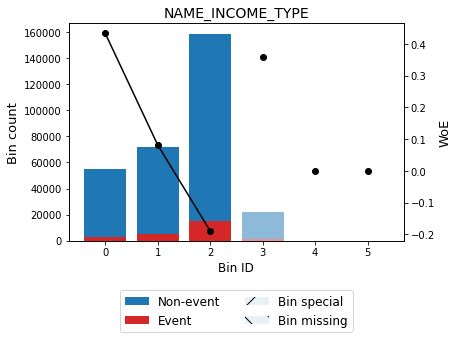

In [46]:
binning_table.plot(metric="woe") 

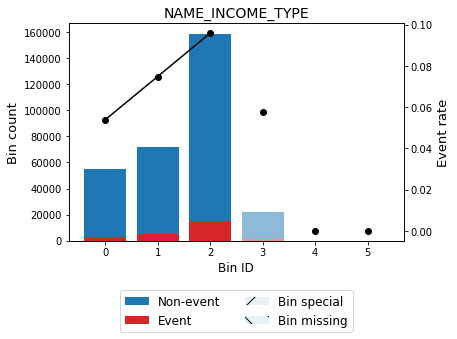

In [47]:
binning_table.plot(metric="event_rate") # bin's area always monotonically ascending with event rate


In [35]:
optb.information()

optbinning (Version 0.14.1)
Copyright (c) 2019-2022 Guillermo Navas-Palencia, Apache License 2.0

  Name    : NAME_INCOME_TYPE                
  Status  : OPTIMAL                         

  Pre-binning statistics
    Number of pre-bins                     3
    Number of refinements                  0

  Solver statistics
    Type                                 mip
    Number of variables                    9
    Number of constraints                  6
    Objective value                   0.0524
    Best objective bound              0.0524

  Timing
    Total time                          0.12 sec
    Pre-processing                      0.09 sec   ( 76.79%)
    Pre-binning                         0.03 sec   ( 21.91%)
    Solver                              0.00 sec   (  1.04%)
    Post-processing                     0.00 sec   (  0.02%)



## Getting Kagle Credit Risk Default Dataset
https://www.kaggle.com/competitions/home-credit-default-risk/data
    

In [40]:
df_app = pd.read_csv("./home-credit-default-risk/application_train.csv")
df_app.set_index('SK_ID_CURR', inplace=True)

In [43]:
df_app["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

## Preprocessing

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale

X = df_app.drop("TARGET", axis = 1)
y = df_app.TARGET

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 88)


In [100]:
# List of all the features

list_features = df_app.drop("TARGET", axis = 1).columns.values
list_categorical = df_app.select_dtypes(include=['object', 'category']).columns.values

# Define selection criteria for BinningProcess
selection_criteria = {"iv": {"min": 0.005, 'max':0.5, "strategy": "highest"}}

In [101]:
list_categorical

array(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'], dtype=object)

In [102]:
from optbinning import Scorecard, BinningProcess

# Instatiate BinningProcess
binning_process = BinningProcess(
    categorical_variables=list_categorical,
    variable_names=list_features,
    selection_criteria=selection_criteria,
)

In [103]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=3, max_iter=1000, random_state=161)

In [104]:
# Define scaling method and values
scaling_method = "min_max"
scaling_method_data = {"min": 0, "max": 1000}

# Instatiate and fit Scorecard
scorecard = Scorecard(
    #target='TARGET',
    binning_process=binning_process,
    estimator=logreg,
    scaling_method=scaling_method,
    scaling_method_params=scaling_method_data,
    intercept_based=False,
    reverse_scorecard=True,
)

scorecard.fit(X_train, y_train)

Scorecard(binning_process=BinningProcess(categorical_variables=array(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSM...
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype=object)),
          estimator=LogisticRegression(C=3, max_iter=1000, random_state=161),
          reverse_scorecard=True, scaling_method='min_max',
          scaling_method_params={'max': 1000, 'min': 0})

In [110]:
scorecard_summary = scorecard.table(style="detailed").round(3)
scorecard_summary.to_csv('scorecard_table_detailed.csv', index=False)

In [111]:
scorecard_summary

,Variable,Bin id,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Coefficient,Points
0,NAME_CONTRACT_TYPE,0,[Revolving loans],23446,0.095,22171,1275,0.054,0.420,0.014,0.002,-0.668,-7.761
1,NAME_CONTRACT_TYPE,1,[Cash loans],222562,0.905,204045,18517,0.083,-0.037,0.001,0.000,-0.668,6.837
2,NAME_CONTRACT_TYPE,2,Special,0,0.000,0,0,0.000,0.000,0.000,0.000,-0.668,5.667
3,NAME_CONTRACT_TYPE,3,Missing,0,0.000,0,0,0.000,0.000,0.000,0.000,-0.668,5.667
0,CODE_GENDER,0,"[XNA, F]",161949,0.658,150658,11291,0.070,0.155,0.015,0.002,-0.661,0.765
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,AMT_REQ_CREDIT_BUREAU_YEAR,2,"[1.50, 3.50)",66986,0.272,61625,5361,0.080,0.006,0.000,0.000,-0.381,5.563
3,AMT_REQ_CREDIT_BUREAU_YEAR,3,"[3.50, 4.50)",16510,0.067,15158,1352,0.082,-0.019,0.000,0.000,-0.381,6.019
4,AMT_REQ_CREDIT_BUREAU_YEAR,4,"[4.50, inf)",21008,0.085,19188,1820,0.087,-0.081,0.001,0.000,-0.381,7.143
5,AMT_REQ_CREDIT_BUREAU_YEAR,5,Special,0,0.000,0,0,0.000,0.000,0.000,0.000,-0.381,5.667


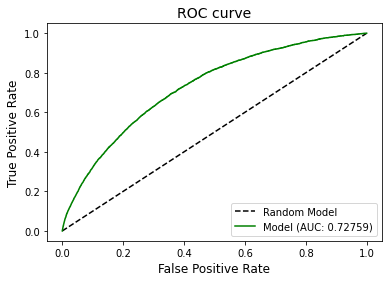

In [115]:
from optbinning.scorecard.plots import plot_ks, plot_auc_roc

# Assign score and predicted probability to test dataset
X_test.loc[:,"score"] = scorecard.score(X_test)


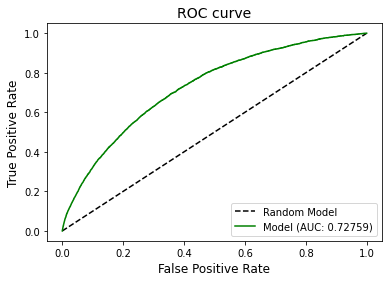

In [116]:
# ROC-AUC plot
plot_auc_roc(y_test, X_test.score)

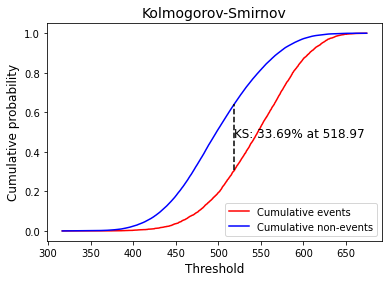

In [117]:
# Kolmogorov_Smirnov Plot
plot_ks(y_test, X_test.score)

In [119]:
import pickle

# To pickle a Scorecard object
with open('scorecard_model.pickle', 'wb') as pfile:
   pickle.dump(scorecard, pfile)
    
# To unpickle it
with open("scorecard_model.pickle", 'rb') as scorecard_pickle:
    scorecard_production = pickle.load(scorecard_pickle)
    
# To use the Scorecard model for predictions in production
# For one sample
scorecard_production.score(X_test.iloc[0:1, :])

# For a few samples
scorecard_production.score(X_test.iloc[0:3, :])

array([481.15632981, 520.21061724, 477.49458866])